In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import json
import pandas as pd
import funciones_movimientos as fm #Funciones customizadas
import funciones_fechas as ff #Funciones customizadas
import psycopg2
from datetime import date, datetime, timedelta
conn = psycopg2.connect("host='postgre-sqltest.cpdeokpzufj1.us-west-2.rds.amazonaws.com' port=5432 dbname='postgres' user=xseed password=LosTilos114")
crs = {'init': 'epsg:4326'}

def cast_date(date):
    return datetime.strptime(date, '%Y-%m-%d')

In [3]:
query = '''
SELECT  uts.anual_total_use_day, uts.date, wc.precipitation, wc.temp_max, wc.temp_media, wc.temp_min, wc.wind_speed,
       aq.dioxido_nitrogeno
FROM user_total_statistics uts
left join weather_conditions wc on wc.date = uts.date
left join air_quality aq on aq.date = uts.date
'''

data_usos = pd.read_sql(query, conn)


In [4]:
data_usos['date'] = [str(i) for i in data_usos.date]
data_usos['date'] = data_usos.date.apply(cast_date)


In [5]:
data_usos['season'] = data_usos.apply(ff.get_season_row, axis = 1)

In [6]:
data_usos['weekend'] = data_usos.date.apply(ff.isWeekend)

In [8]:
data_usos.to_csv('usos_para_modelo.csv')

In [16]:
data_usos = pd.read_csv('usos_para_modelo.csv', index_col = False)

In [18]:
data_usos = data_usos.drop('Unnamed: 0', 1)

In [29]:
data_usos.head()

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,month,year
2,17,2014-06-23,0.0,29.7,23.2,16.6,1.7,20.0,Verano,0,6,2014
3,24,2014-06-24,0.0,19.8,18.4,17.0,1.7,17.0,Verano,0,6,2014
0,105,2014-06-25,1.7,27.0,21.6,16.2,1.4,20.0,Verano,0,6,2014
4,120,2014-06-26,0.4,26.2,20.8,15.5,0.6,21.0,Verano,0,6,2014
5,131,2014-06-27,0.0,30.4,23.7,17.0,2.2,23.0,Verano,0,6,2014


In [21]:
data_usos['date'] = data_usos.date.apply(cast_date)

In [24]:
data_usos['month'] = data_usos.apply(lambda fila: fila.date.month, axis=1)
data_usos['year'] = data_usos.apply(lambda fila: fila.date.year, axis=1)

In [26]:
data_usos = data_usos.sort_values('date', ascending=True)

In [32]:
data_usos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1653 entries, 2 to 1652
Data columns (total 12 columns):
anual_total_use_day    1653 non-null int64
date                   1653 non-null datetime64[ns]
precipitation          1651 non-null float64
temp_max               1651 non-null float64
temp_media             1651 non-null float64
temp_min               1651 non-null float64
wind_speed             1651 non-null float64
dioxido_nitrogeno      1650 non-null float64
season                 1653 non-null category
weekend                1653 non-null category
month                  1653 non-null category
year                   1653 non-null category
dtypes: category(4), datetime64[ns](1), float64(6), int64(1)
memory usage: 123.6 KB


In [31]:
data_usos.season = data_usos.season.astype('category')
data_usos.weekend = data_usos.weekend.astype('category')
data_usos.month = data_usos.month.astype('category')
data_usos.year = data_usos.year.astype('category')

In [43]:
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 14, 10
sns.set_context('talk')
sns.set_style("darkgrid")

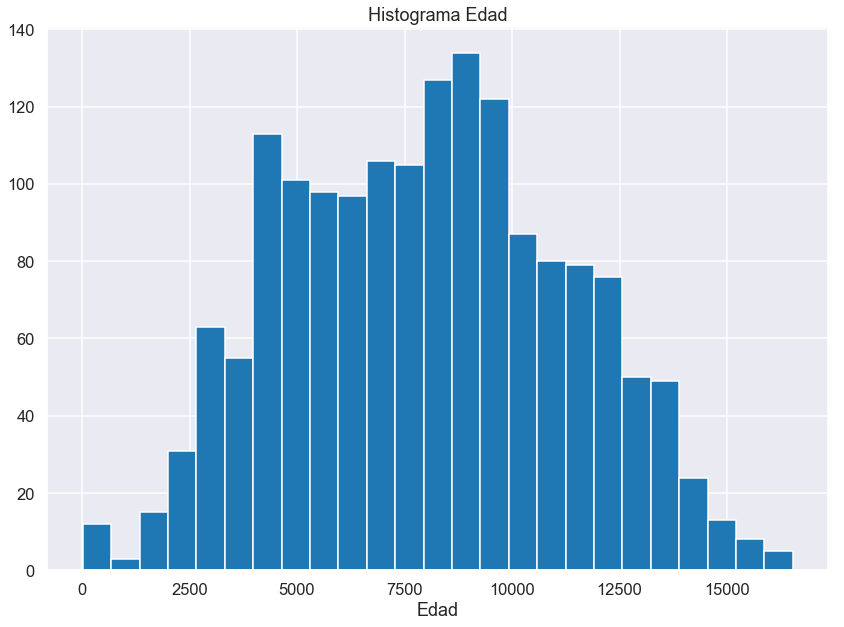

In [44]:
g = plt.hist(data_usos.anual_total_use_day, bins=25)

plt.title('Histograma Edad')
plt.xlabel('Edad')
plt.show()

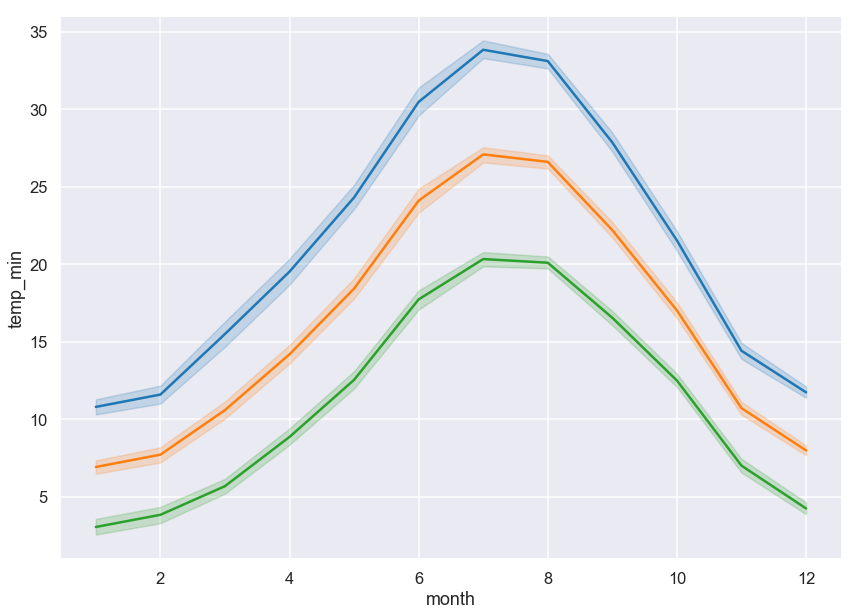

In [63]:
sns.lineplot(data=data_usos, x='month',
                   y='temp_max', palette="Set2",
                   linewidth=2.5, legend='full')
sns.lineplot(data=data_usos, x='month',
                   y='temp_media', palette="Set2",
                   linewidth=2.5, legend='full')
sns.lineplot(data=data_usos, x='month',
                   y='temp_min', palette="Set2",
                   linewidth=2.5, legend='full')

In [49]:
data_usos.var()

anual_total_use_day    1.059296e+07
precipitation          1.247115e+01
temp_max               8.351703e+01
temp_media             6.247936e+01
temp_min               4.717645e+01
wind_speed             9.903858e-01
dioxido_nitrogeno      2.726983e+02
weekend                2.041310e-01
month                  1.172239e+01
year                   1.746717e+00
dtype: float64

C:\Users\alejo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


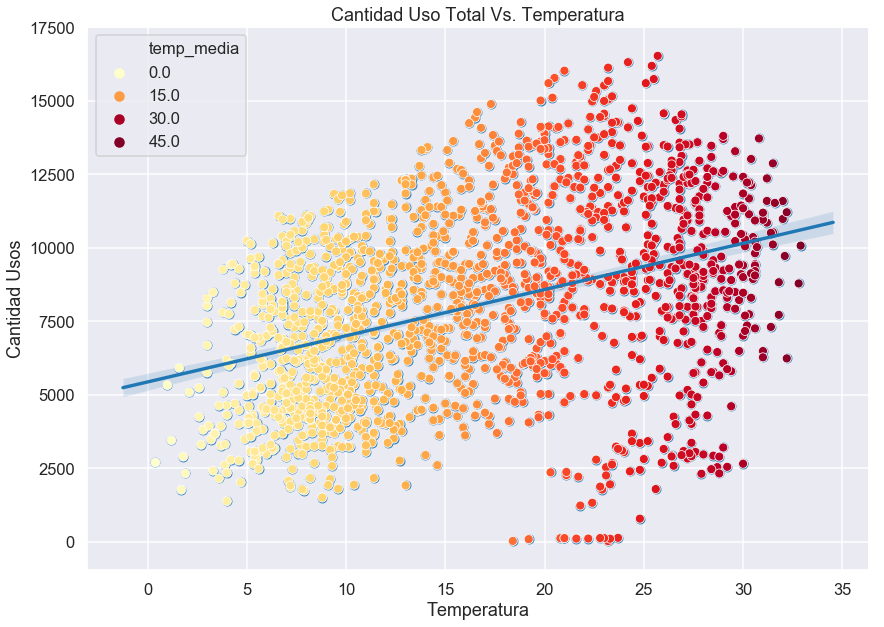

In [51]:
out = sns.regplot(x='temp_media', y='anual_total_use_day', data=data_usos )
out = sns.scatterplot(x='temp_media', y='anual_total_use_day', data=data_usos , hue='temp_media', palette='YlOrRd')

plt.xlabel('Temperatura')
plt.ylabel('Cantidad Usos')
plt.title('Cantidad Uso Total Vs. Temperatura')
plt.show()

NameError: name 'axes' is not defined

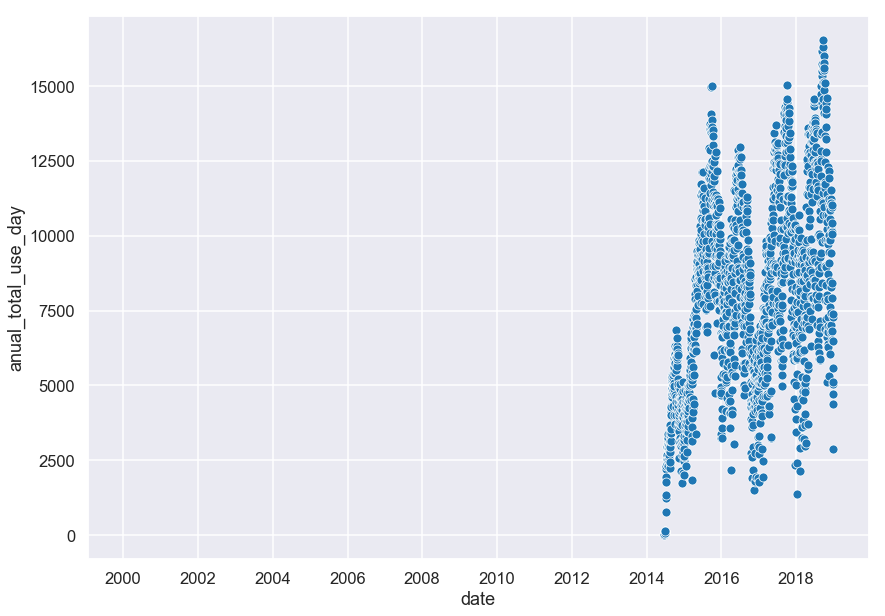

In [89]:
out = sns.scatterplot(x='date', y='anual_total_use_day', data=data_usos)
axes[0,0].set_ylim(2014,)
plt.xlabel('Temperatura')
plt.ylabel('Cantidad Usos')
plt.title('Cantidad Uso Total Vs. Temperatura')
plt.show()

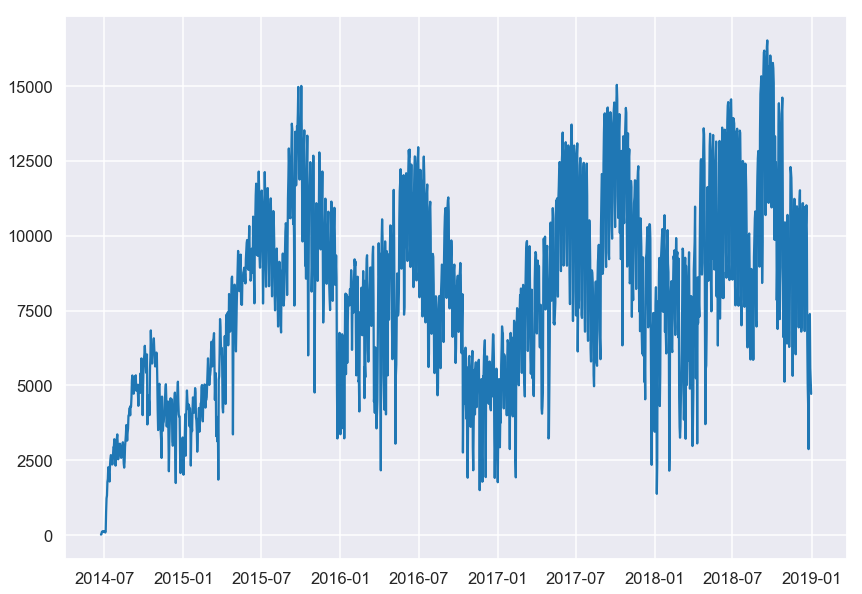

In [80]:
plt.plot(data_usos.date, data_usos.anual_total_use_day)
plt.show()

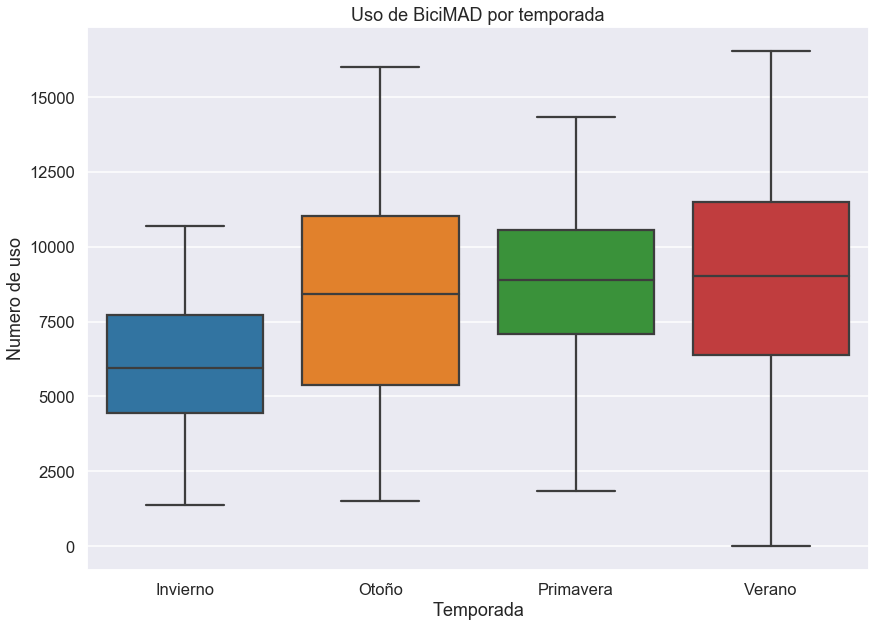

In [72]:
g = sns.boxplot(x='season', y='anual_total_use_day', data=data_usos)

plt.title('Uso de BiciMAD por temporada')
plt.xlabel('Temporada')
plt.ylabel("Numero de uso")
plt.show()

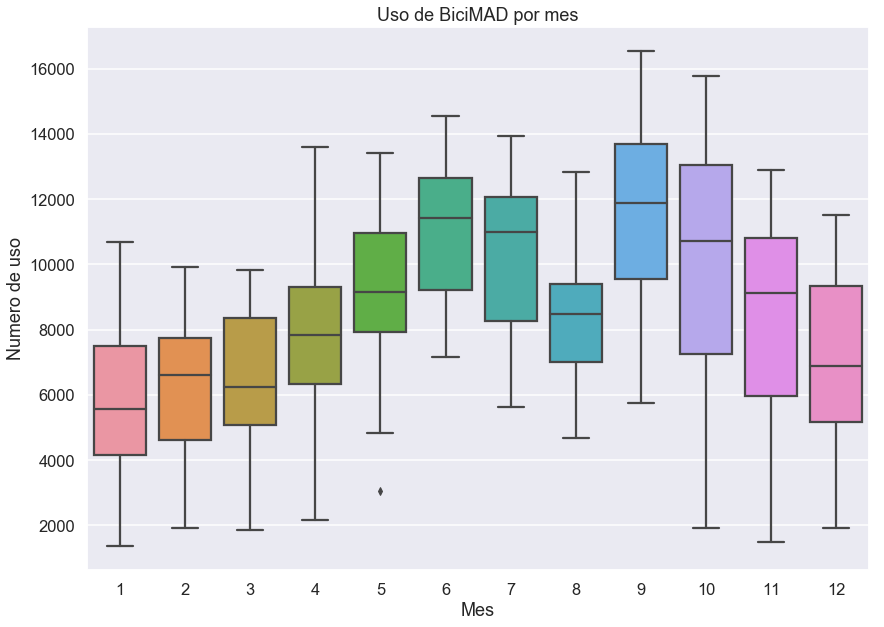

In [84]:
g = sns.boxplot(x='month', y='anual_total_use_day', data=data_usos[(data_usos.year != 2014)])

plt.title('Uso de BiciMAD por mes')
plt.xlabel('Mes')
plt.ylabel("Numero de uso")
plt.show()

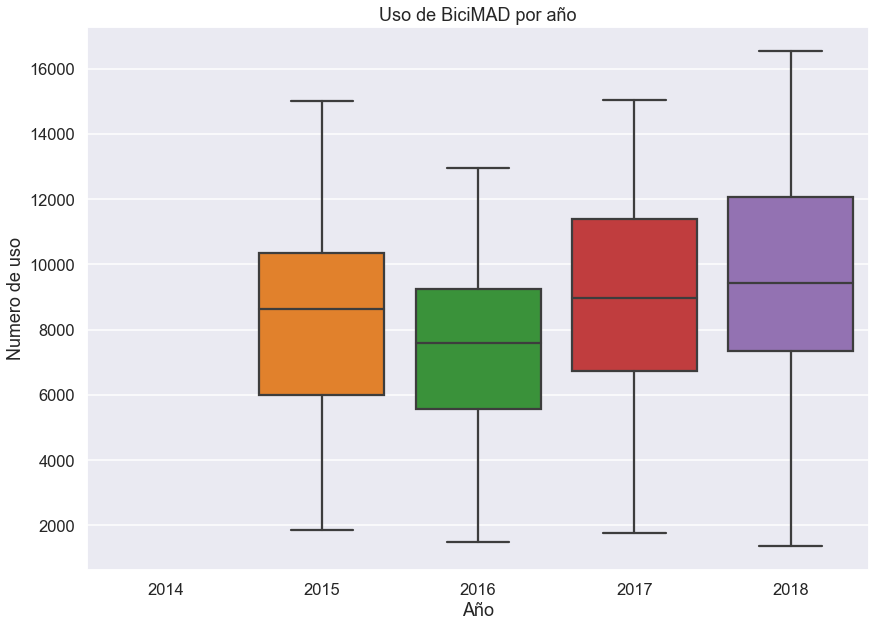

In [82]:
g = sns.boxplot(x='year', y='anual_total_use_day', data=data_usos[(data_usos.year != 2014)])

plt.title('Uso de BiciMAD por año')
plt.xlabel('Año')
plt.ylabel("Numero de uso")
plt.show()

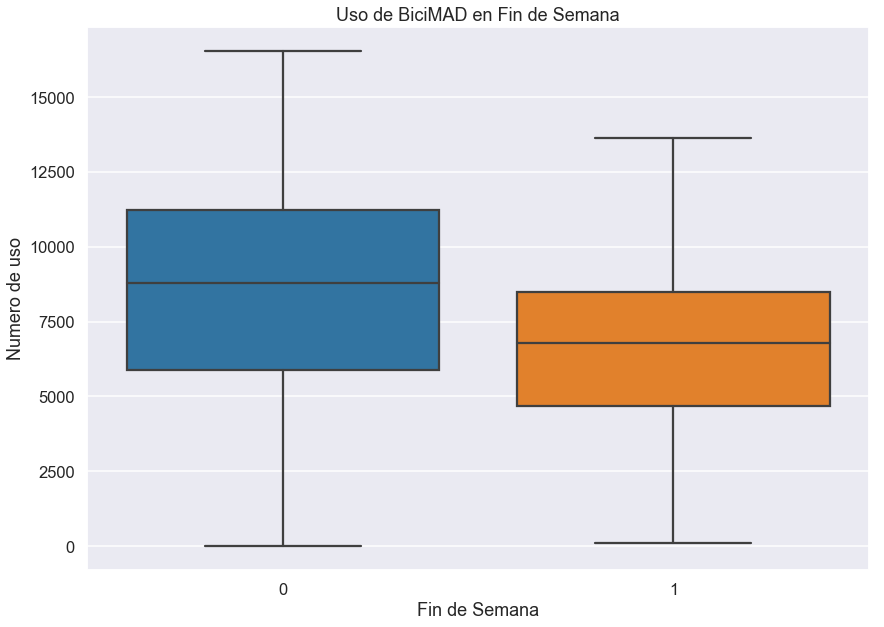

In [73]:
g = sns.boxplot(x='weekend', y='anual_total_use_day', data=data_usos)

plt.title('Uso de BiciMAD en Fin de Semana')
plt.xlabel('Fin de Semana')
plt.ylabel("Numero de uso")
plt.show()